In [3]:
library(M3C)
library(NMF) # loading for aheatmap function
library(gplots) # has a nice colour scale
library(ggsci) # more cool colours


Loading required package: pkgmaker
Loading required package: registry

Attaching package: ‘pkgmaker’

The following object is masked from ‘package:base’:

    isFALSE

Loading required package: rngtools
Loading required package: cluster
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8
  To enable shared memory capabilities, try: install.extras('
NMF
')

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: limma

Attaching package: ‘limma’

The following object is masked from ‘package:BiocGenerics’:

    plotMA



In [4]:
x <- read.csv('Norm_Comb_Data.csv')
rownames(x) <- x$X
x$X <- NULL

In [5]:
    x_pos <- nneg(as.matrix(highly_variable_genes), method=c("min"))

[1] 2000

***M3C: Monte Carlo Reference-based Consensus Clustering***
method: reference simulation
clustering algorithm: pam
annotation: none
running simulations...


  |======================================================================| 100%


finished generating reference distribution
running consensus cluster algorithm for real data...
finished


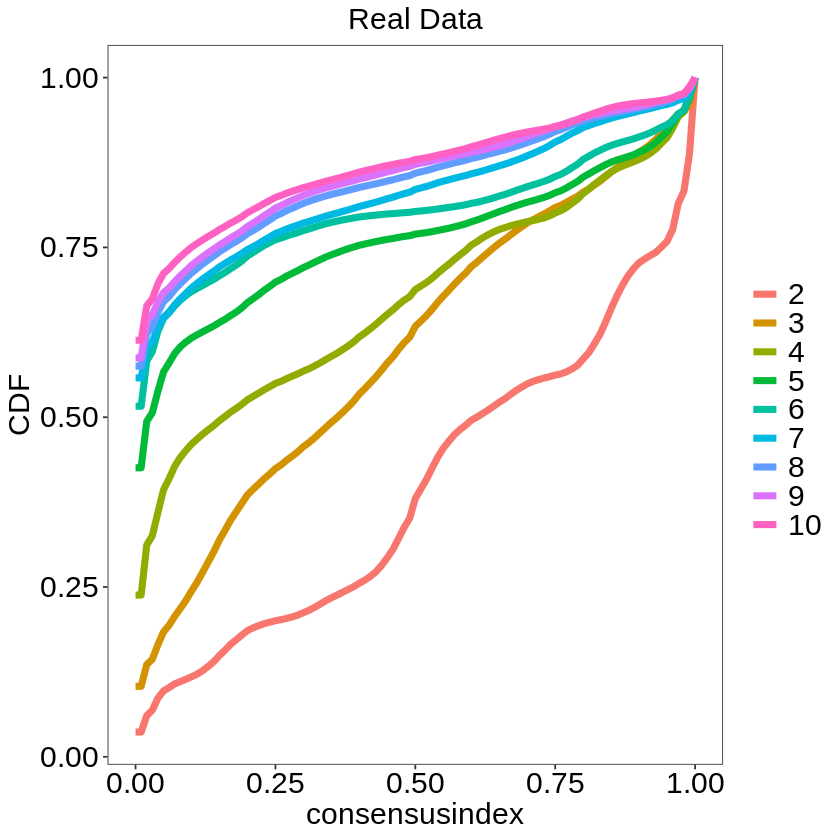

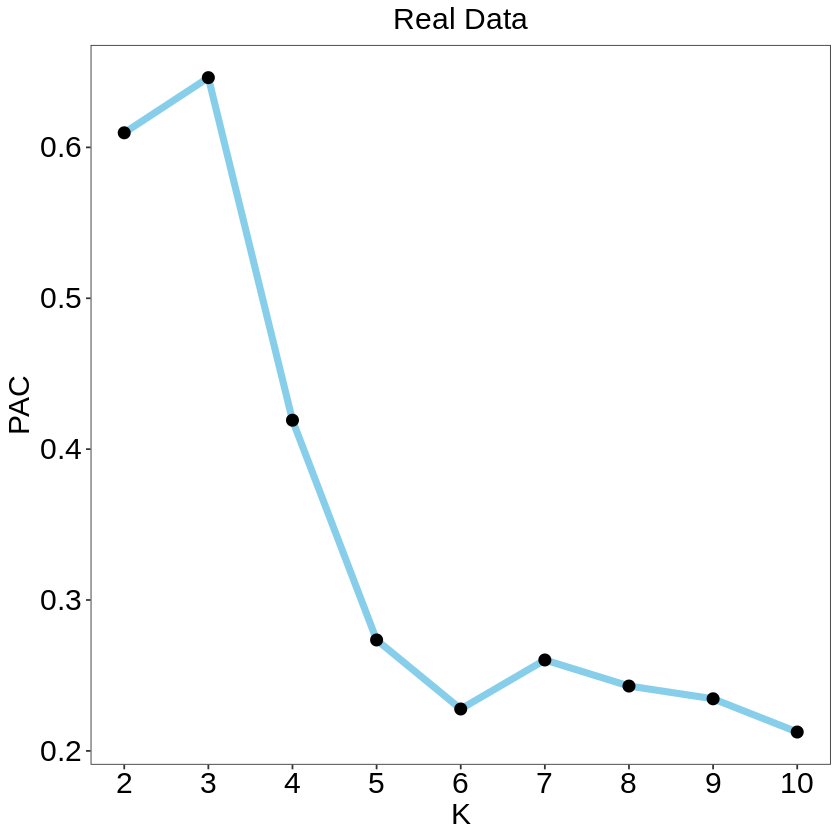

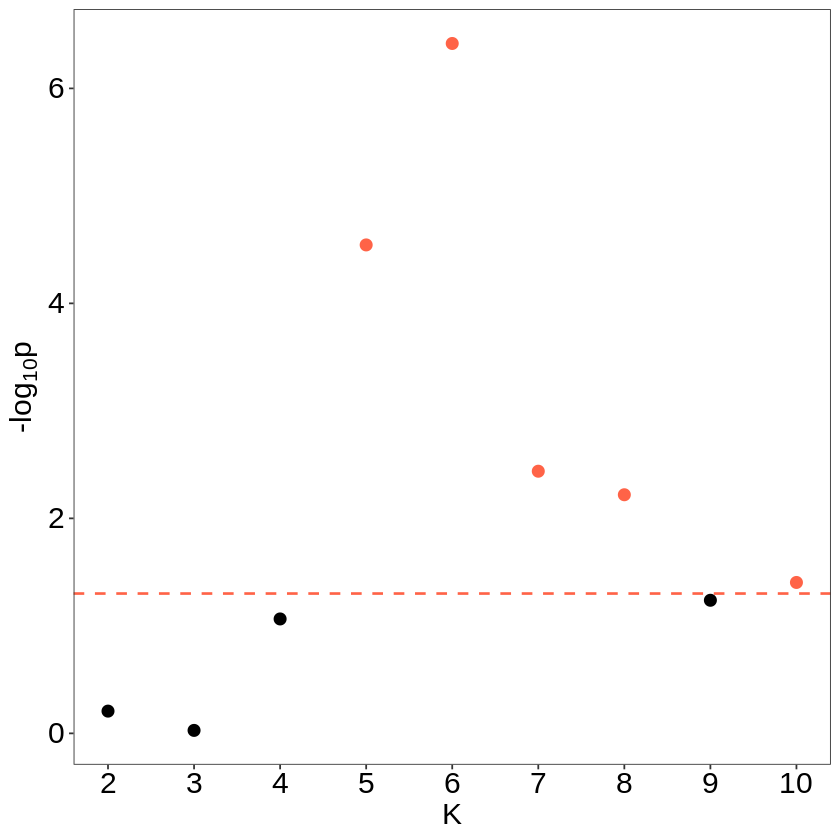

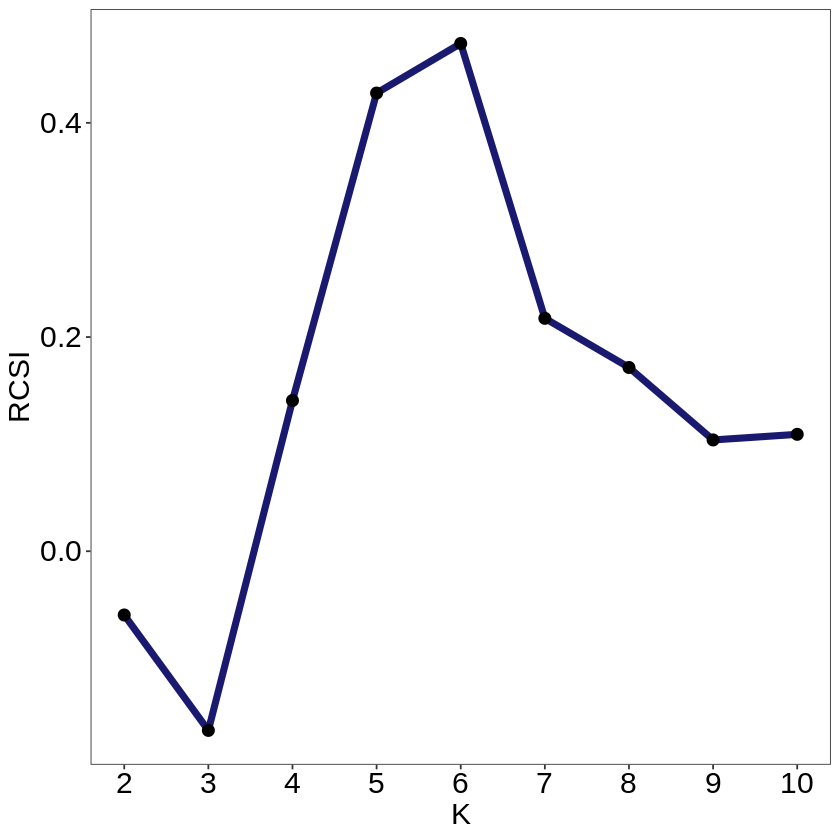

In [7]:
res <- M3C(x_pos, cores=4, seed = 1234, des = NULL)


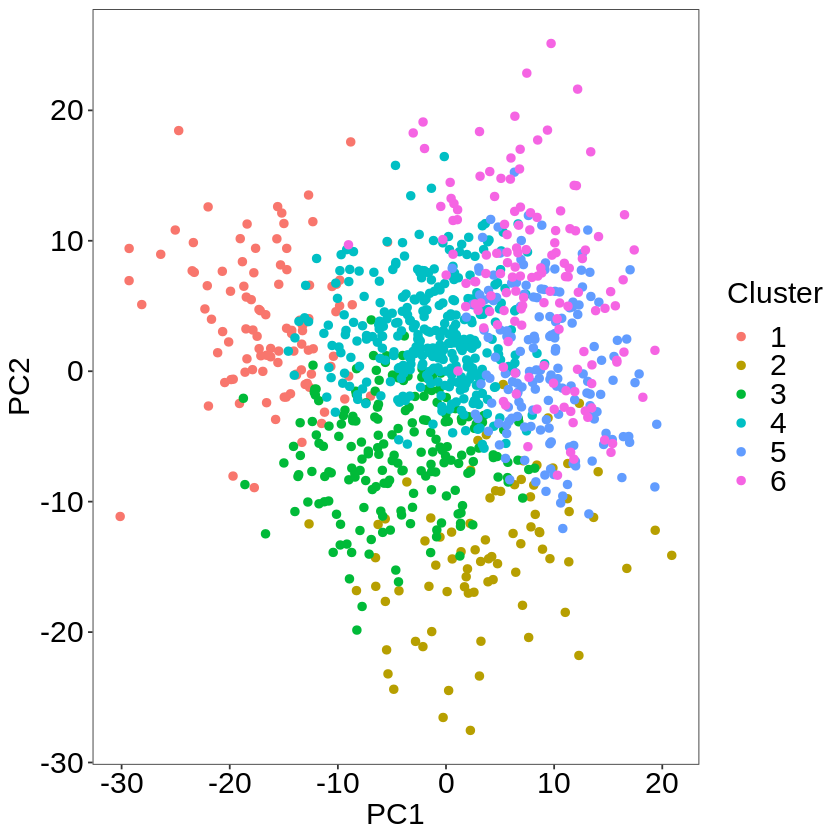

In [38]:
pca(res, K=6, dotsize=2) 

In [24]:
?pca

In [9]:
data <- res$realdataresults[[6]]$ordered_data # this is the data
annon <- res$realdataresults[[6]]$ordered_annotation # this is the annotation
ccmatrix <- res$realdataresults[[6]]$consensus_matrix # this is the consensus matrix
head(annon)

,consensuscluster
,<fct>
GSM2287305,1
T_10_10_A222aa,1
GSM1844218,1
TCGA.LB.A9Q5.01A.11R.A39D.07,1
GSM2287334,1
GSM1520813,1


In [10]:
# normalise and scale the data
data <- t(scale(t(data))) # z-score normalise each row (feature)
data <- apply(data, 2, function(x) ifelse(x > 4, 4, x)) # compress data within range
data <- apply(data, 2, function(x) ifelse(x < -4, -4, x)) # compress data within range

In [40]:
# get some cool colour palettes from the ggsci package and RColourBrewer
ann_colors <- ggsci::pal_startrek("uniform")(4) # star trek palette
ann_colors2 <- ggsci::	()(6) # futurama palette
pal <- rev(colorRampPalette(RColorBrewer::brewer.pal(10, "RdBu"))(256))

ERROR: Error in parse(text = x, srcfile = src): <text>:3:25: unexpected '('
2: ann_colors <- ggsci::pal_startrek("uniform")(4) # star trek palette
3: ann_colors2 <- ggsci::  (
                           ^


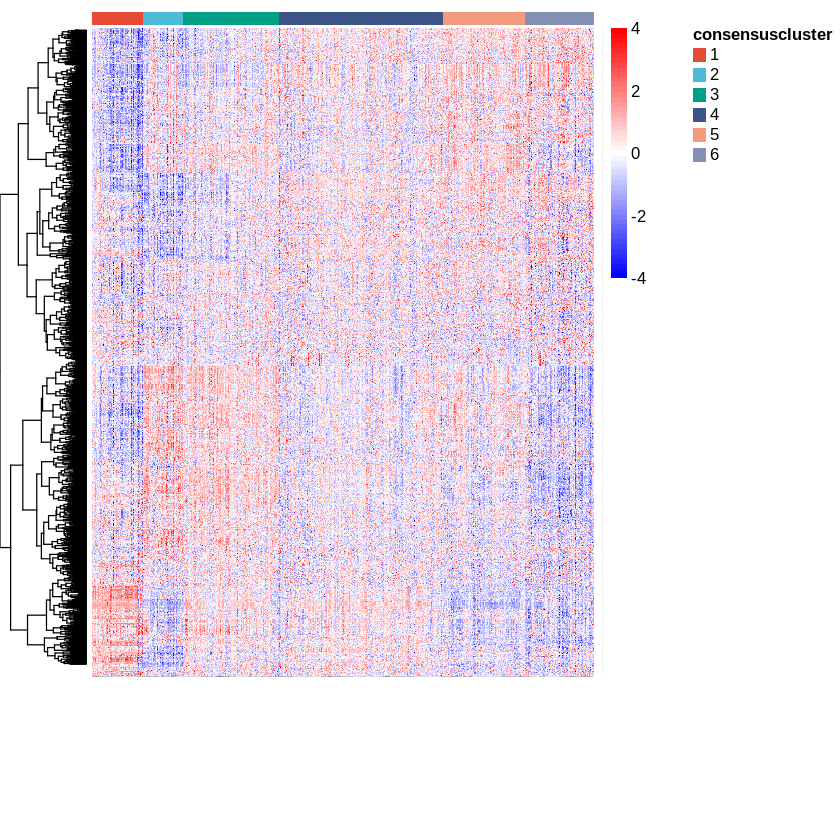

In [23]:
pal <- rev(colorRampPalette(RColorBrewer::brewer.pal(10, "RdBu"))(256))
NMF::aheatmap(data, annCol = annon, Colv = NA, distfun = 'pearson', 
         color = gplots::bluered(256), 
         annColors = list(class=ann_colors, consensuscluster=ann_colors2))

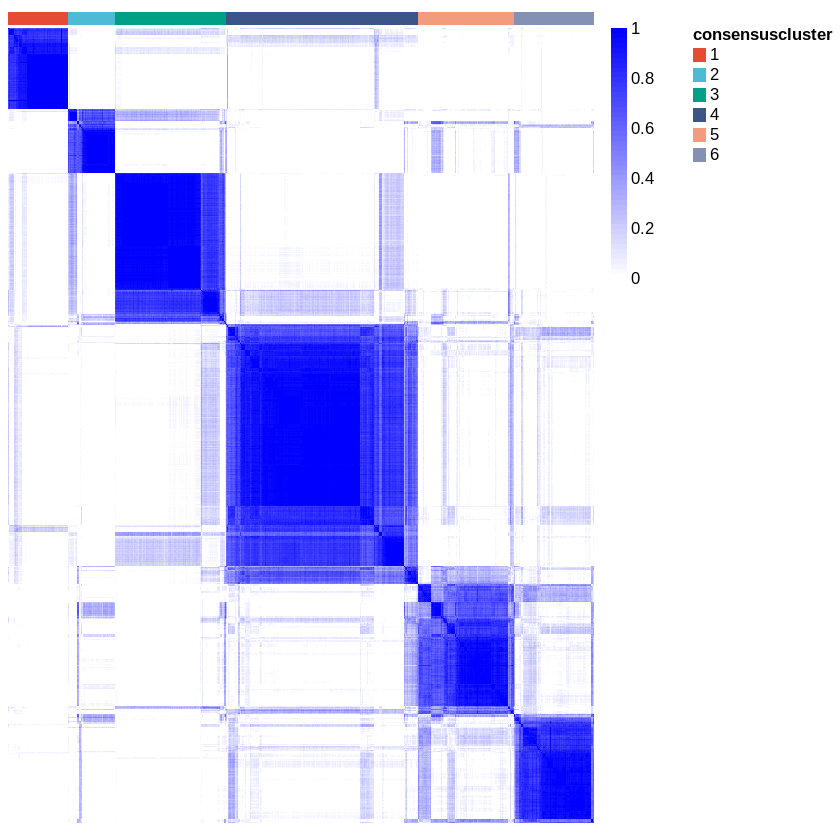

In [41]:
# set up colours
n <- 10
seq = rev(seq(0,255,by=255/(n)))
palRGB = cbind(seq,seq,255)
mypal <-rgb(palRGB,maxColorValue=255)
# plot consensus matrix heatmap, do not cluster rows and columns
NMF::aheatmap(ccmatrix, 
              annCol = annon[,1,drop=FALSE], 
              color = mypal, scale = 'none', cexRow = 0, cexCol = 0,
              Colv=NA,Rowv=NA,annColors = list(consensuscluster=ann_colors2))

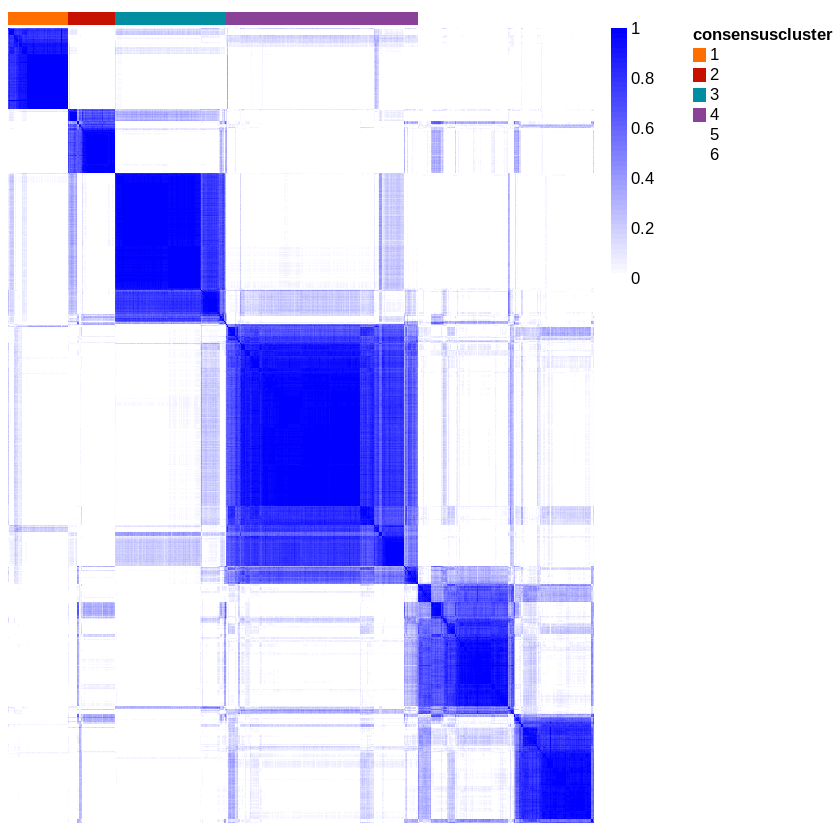

ERROR: Error in names(x) <- value: 'names' attribute [2] must be the same length as the vector [1]
